In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [170]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [171]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [172]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
3/3 - 5s - loss: 0.3199 - val_loss: 0.0380 - 5s/epoch - 2s/step
Epoch 2/50
3/3 - 0s - loss: 0.2887 - val_loss: 0.0307 - 70ms/epoch - 23ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2614 - val_loss: 0.0266 - 68ms/epoch - 23ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2351 - val_loss: 0.0259 - 77ms/epoch - 26ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2109 - val_loss: 0.0283 - 81ms/epoch - 27ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1886 - val_loss: 0.0338 - 69ms/epoch - 23ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1681 - val_loss: 0.0423 - 74ms/epoch - 25ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1495 - val_loss: 0.0535 - 67ms/epoch - 22ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1343 - val_loss: 0.0676 - 72ms/epoch - 24ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1200 - val_loss: 0.0840 - 75ms/epoch - 25ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1074 - val_loss: 0.1024 - 82ms/epoch - 27ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0961 - val_loss: 0.1221 - 72ms/epoch - 24ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0877 - val_loss: 0.143

In [173]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


1/1 [==============================] - 1s 861ms/step
Mean Squared Error (MSE): 7532268.896119531
Mean Absolute Error (MAE): 2594.1757535802703
Mean Absolute Percentage Error (MAPE): 25.09%


1/1 [==============================] - 0s 65ms/step


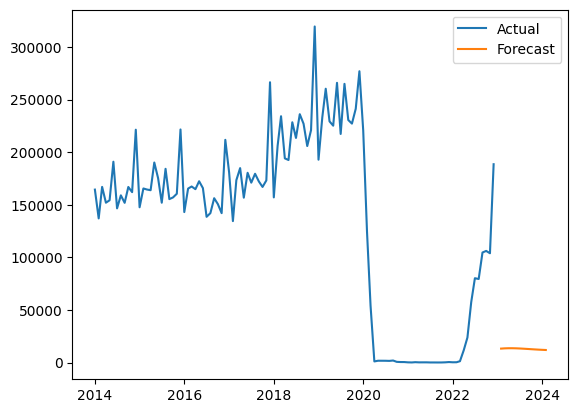

In [185]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]

# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.legend()
plt.show()


TEST SIZE 70:30

In [191]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [192]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [193]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
3/3 - 9s - loss: 0.2965 - val_loss: 0.0235 - 9s/epoch - 3s/step
Epoch 2/50
3/3 - 0s - loss: 0.2667 - val_loss: 0.0305 - 67ms/epoch - 22ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2388 - val_loss: 0.0405 - 66ms/epoch - 22ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2127 - val_loss: 0.0537 - 62ms/epoch - 21ms/step
Epoch 5/50
3/3 - 0s - loss: 0.1870 - val_loss: 0.0700 - 59ms/epoch - 20ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1635 - val_loss: 0.0896 - 61ms/epoch - 20ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1412 - val_loss: 0.1124 - 59ms/epoch - 20ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1204 - val_loss: 0.1384 - 69ms/epoch - 23ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1017 - val_loss: 0.1678 - 58ms/epoch - 19ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0845 - val_loss: 0.2003 - 60ms/epoch - 20ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0689 - val_loss: 0.2355 - 74ms/epoch - 25ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0559 - val_loss: 0.2737 - 60ms/epoch - 20ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0442 - val_loss: 0.314

In [194]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


2/2 [==============================] - 1s 4ms/step
Mean Squared Error (MSE): 20320397.86173858
Mean Absolute Error (MAE): 4449.94809220727
Mean Absolute Percentage Error (MAPE): 43.09%


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 68ms/step


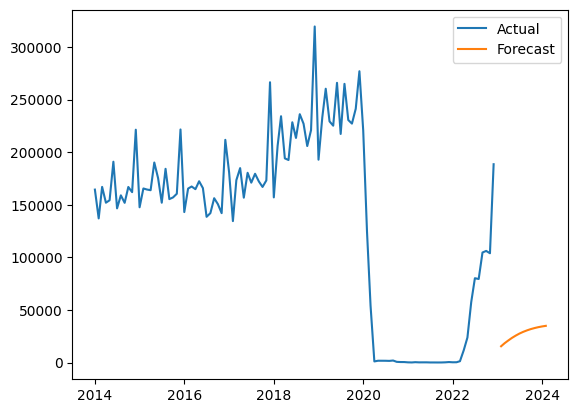

In [195]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]

# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.legend()
plt.show()


TEST SIZE 60:40

In [196]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [197]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [198]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
2/2 - 5s - loss: 0.4055 - val_loss: 0.2108 - 5s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.3812 - val_loss: 0.1925 - 80ms/epoch - 40ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3565 - val_loss: 0.1759 - 83ms/epoch - 41ms/step
Epoch 4/50
2/2 - 0s - loss: 0.3336 - val_loss: 0.1607 - 87ms/epoch - 44ms/step
Epoch 5/50
2/2 - 0s - loss: 0.3114 - val_loss: 0.1472 - 78ms/epoch - 39ms/step
Epoch 6/50
2/2 - 0s - loss: 0.2894 - val_loss: 0.1352 - 63ms/epoch - 31ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2690 - val_loss: 0.1247 - 87ms/epoch - 44ms/step
Epoch 8/50
2/2 - 0s - loss: 0.2496 - val_loss: 0.1157 - 75ms/epoch - 37ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2306 - val_loss: 0.1081 - 59ms/epoch - 30ms/step
Epoch 10/50
2/2 - 0s - loss: 0.2124 - val_loss: 0.1020 - 98ms/epoch - 49ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1949 - val_loss: 0.0973 - 104ms/epoch - 52ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1790 - val_loss: 0.0940 - 78ms/epoch - 39ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1632 - val_loss: 0.09

In [199]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


2/2 [==============================] - 1s 4ms/step
Mean Squared Error (MSE): 12455280.530070193
Mean Absolute Error (MAE): 3177.5347345144664
Mean Absolute Percentage Error (MAPE): 30.39%


1/1 [==============================] - 0s 29ms/step


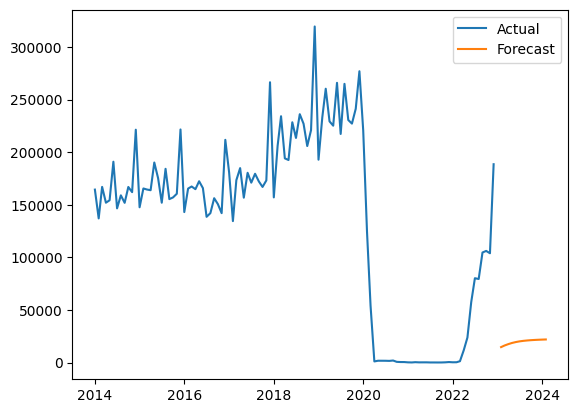

In [208]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]

# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.legend()
plt.show()
